importing all the dependencies


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Now importing the dataset

In [7]:
house_price_dataset=sklearn.datasets.fetch_california_housing()

In [8]:
print (house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

loading dataset to a pandas df

In [9]:
house_price_dataframe = pd.DataFrame(house_price_dataset.data,columns=house_price_dataset.feature_names)

In [12]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Now adding the target coloumn to the df

In [13]:
house_price_dataframe['price']=house_price_dataset.target

In [14]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [16]:
house_price_dataframe.shape

(20640, 9)

Now checking for missing values

In [17]:
house_price_dataframe.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
price,0


In [18]:
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Now understanding the correlation of the dataset

In [19]:
correlation = house_price_dataframe.corr()

In [20]:
print(correlation)

              MedInc  HouseAge  AveRooms  AveBedrms  ...  AveOccup  Latitude  Longitude     price
MedInc      1.000000 -0.119034  0.326895  -0.062040  ...  0.018766 -0.079809  -0.015176  0.688075
HouseAge   -0.119034  1.000000 -0.153277  -0.077747  ...  0.013191  0.011173  -0.108197  0.105623
AveRooms    0.326895 -0.153277  1.000000   0.847621  ... -0.004852  0.106389  -0.027540  0.151948
AveBedrms  -0.062040 -0.077747  0.847621   1.000000  ... -0.006181  0.069721   0.013344 -0.046701
Population  0.004834 -0.296244 -0.072213  -0.066197  ...  0.069863 -0.108785   0.099773 -0.024650
AveOccup    0.018766  0.013191 -0.004852  -0.006181  ...  1.000000  0.002366   0.002476 -0.023737
Latitude   -0.079809  0.011173  0.106389   0.069721  ...  0.002366  1.000000  -0.924664 -0.144160
Longitude  -0.015176 -0.108197 -0.027540   0.013344  ...  0.002476 -0.924664   1.000000 -0.045967
price       0.688075  0.105623  0.151948  -0.046701  ... -0.023737 -0.144160  -0.045967  1.000000

[9 rows x 9 columns

But constructing a heatman can make us understand even better


<Axes: >

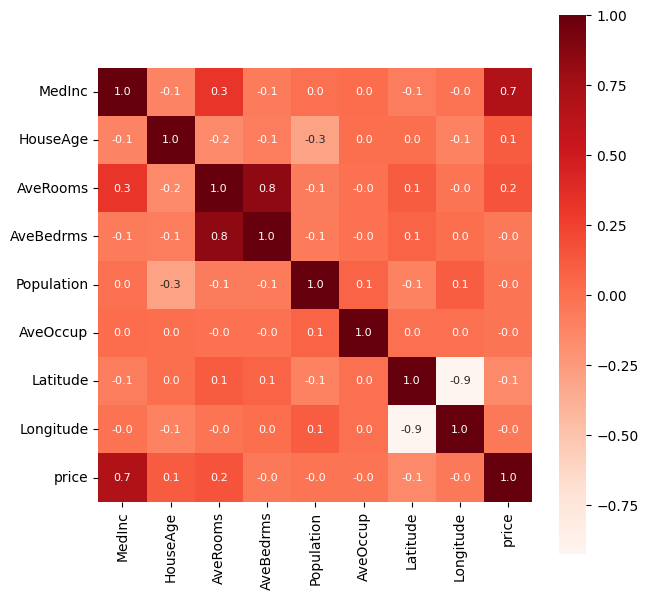

In [24]:
plt.figure(figsize=(7,7))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Reds')

Splitting the data and the target

In [25]:
X= house_price_dataframe.drop(['price'],axis=1)
Y=house_price_dataframe['price']

In [26]:
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88    -122.23
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86    -122.22
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85    -122.24
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85    -122.25
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85    -122.25
...       ...       ...       ...        ...         ...       ...       ...        ...
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48    -121.09
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49    -121.21
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43    -121.22
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43    -121.32
20639  2.3886      16.0  5.25471

Now split the data into training and test data

In [27]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [28]:
print (X.shape,X_train.shape,X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


In [29]:
print (Y.shape,Y_train.shape,Y_test.shape)

(20640,) (16512,) (4128,)


Now we train the model(XGBoost)

In [30]:
model = XGBRegressor()

In [31]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

After training  the model we do the prediction on the training data

In [32]:
training_data_prediction = model.predict(X_train)

In [33]:
print(training_data_prediction)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


Now comparing the predicted values to the original values of the training data

In [34]:
score_1 = metrics.r2_score(Y_train,training_data_prediction)

In [35]:
print(score_1)

0.943650140819218


In [36]:
score_2 = metrics.mean_absolute_error(Y_train,training_data_prediction)

In [37]:
print(score_2)

0.1933648700612105


Now we compare the predicted values to the original values of the test data

In [40]:
test_data_prediction = model.predict(X_test)

In [41]:
print(test_data_prediction)

[2.8649795  1.790346   0.92074925 ... 1.5385513  0.92647874 2.043316  ]


In [42]:
score_1 = metrics.r2_score(Y_test,test_data_prediction)

In [43]:
score_1

0.8338000331788725

In [44]:
score_2 = metrics.mean_absolute_error(Y_test,test_data_prediction)

In [45]:
score_2

0.3108631800268186

Now trying to visualize the predicted and actual prices

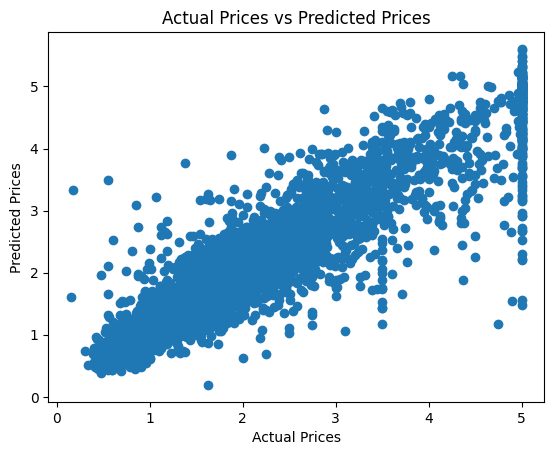

In [46]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

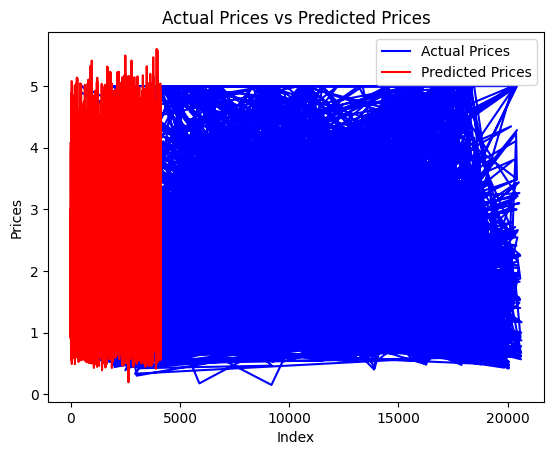

In [47]:
plt.plot(Y_test, label="Actual Prices", color="blue")
plt.plot(test_data_prediction, label="Predicted Prices", color="red")
plt.xlabel("Index")
plt.ylabel("Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.legend()
plt.show()